### 0242. Valid Anagram (Brute Force Approach)

| **Author** | **Last Updated** | **Difficulty** | **Tags** |
| :--- | :--- | :--- | :--- |
| MD Saifullah Baig | 03.01.2026 | Easy | String, Sorting |

**Problem Link:** [LeetCode 0242](https://leetcode.com/problems/valid-anagram/)

---

## 1. Problem Statement
Given two strings `s` and `t`, return `true` if `t` is an **anagram** of `s`, and `false` otherwise.

An **Anagram** is a word or phrase formed by rearranging the letters of a different word or phrase, typically using all the original letters exactly once.

**Example 1:**
```text
Input: s = "anagram", t = "nagaram"
Output: true

## Approach & Complexity:
### Approach: Frequency Counter (Hash Map)
We use a dictionary to count the frequency of every character in the first string, then decrement the counts using the second string.
1. If len(s) != len(t), return False.
2. Create a frequency map for s.
3. Iterate through t:
    - If char is not in map, return False.
    - Decrement count.
    - If count < 0, return False.Return True.
### Complexity Analysis
- Time Complexity: $O(N)$
    We iterate through the strings exactly once.
- Space Complexity: $ O(1) $
    Although we use a map, the number of unique characters is constant (e.g., 26 English letters).
### Advantages-Optimal Speed:
This is the standard efficient solution for interviews.Unicode Support: Works with any character set (emojis, special symbols), unlike the fixed array 

In [1]:
class Solution():
    def isAnagram(self, s: str, t: str) -> bool:
        hash={}
        if len(s)!=len(t):
            return False
        for i in s:
            hash[i]=hash.get(i,0)+1
        for j in t:
            if j not in hash:
                return False
            hash[j]-=1
            if hash[j]<0:
                return False
        return True

In [2]:
s = "rat"
t = "car"
solution=Solution()
print(solution.isAnagram(s,t))

False


## Visualization

   Input Size   Sorting  Hash Map  Fixed Array   Counter
0         100  0.000018  0.000024     0.000021  0.000032
1         300  0.000051  0.000050     0.000050  0.000036
2         500  0.000083  0.000078     0.000087  0.000060
3         800  0.000140  0.000127     0.000129  0.000067
4        2000  0.000371  0.000353     0.000328  0.000162
5        3000  0.000574  0.000479     0.000506  0.000225


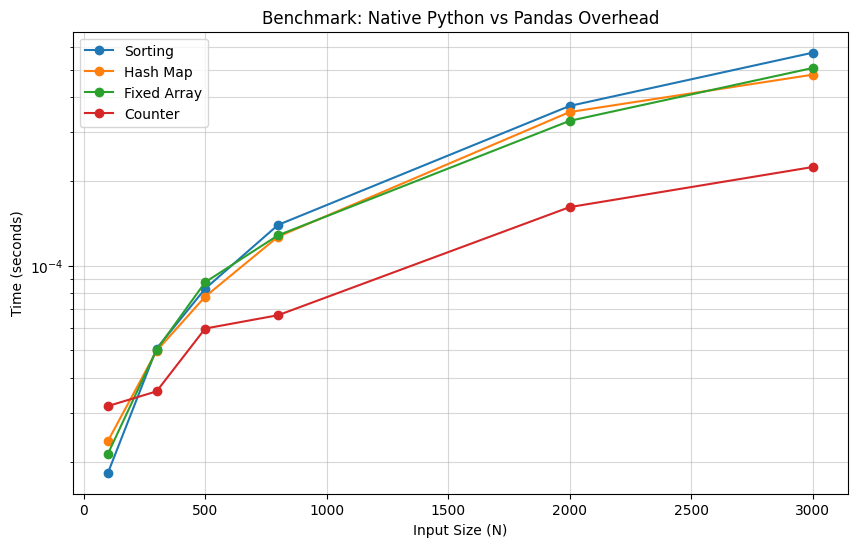

In [8]:
import time
import random
import string
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# 1. Sorting
def isAnagram_sort(s: str, t: str) -> bool:
    if len(s) != len(t): return False
    return sorted(s) == sorted(t)

# 2. Hash Map
def isAnagram_hashmap(s: str, t: str) -> bool:
    if len(s) != len(t): return False
    count = {}
    for char in s:
        count[char] = count.get(char, 0) + 1
    for char in t:
        if char not in count: return False
        count[char] -= 1
        if count[char] < 0: return False
    return True

# 3. Fixed Array
def isAnagram_fixed_array(s: str, t: str) -> bool:
    if len(s) != len(t): return False
    counts = [0] * 26
    for i in range(len(s)):
        counts[ord(s[i]) - ord('a')] += 1
        counts[ord(t[i]) - ord('a')] -= 1
    for val in counts:
        if val != 0: return False
    return True

# 4. Python Counter
def isAnagram_counter(s: str, t: str) -> bool:
    if len(s) != len(t): return False
    return Counter(s) == Counter(t)

# --- Benchmarking ---
input_sizes = [100,300,500,800,2000,3000]
results = []

for n in input_sizes:
    # Generate random data
    s = ''.join(random.choices(string.ascii_lowercase, k=n))
    t_list = list(s)
    random.shuffle(t_list)
    t = ''.join(t_list)
    
    row = {'Input Size': n}
    
    # Measure each function
    funcs = [
        ('Sorting', isAnagram_sort),
        ('Hash Map', isAnagram_hashmap),
        ('Fixed Array', isAnagram_fixed_array),
        ('Counter', isAnagram_counter),
    ]
    
    for name, func in funcs:
        start = time.time()
        func(s, t)
        row[name] = time.time() - start
        
    results.append(row)

# Display DataFrame
df = pd.DataFrame(results)
print(df)

# Plotting
plt.figure(figsize=(10, 6))
for col in df.columns:
    if col != 'Input Size':
        plt.plot(df['Input Size'], df[col], label=col, marker='o')

plt.xlabel('Input Size (N)')
plt.ylabel('Time (seconds)')
plt.title('Benchmark: Native Python vs Pandas Overhead')
plt.legend()
plt.yscale('log') # Log scale handles the huge difference better
plt.grid(True, which="both", ls="-", alpha=0.5)
plt.show()